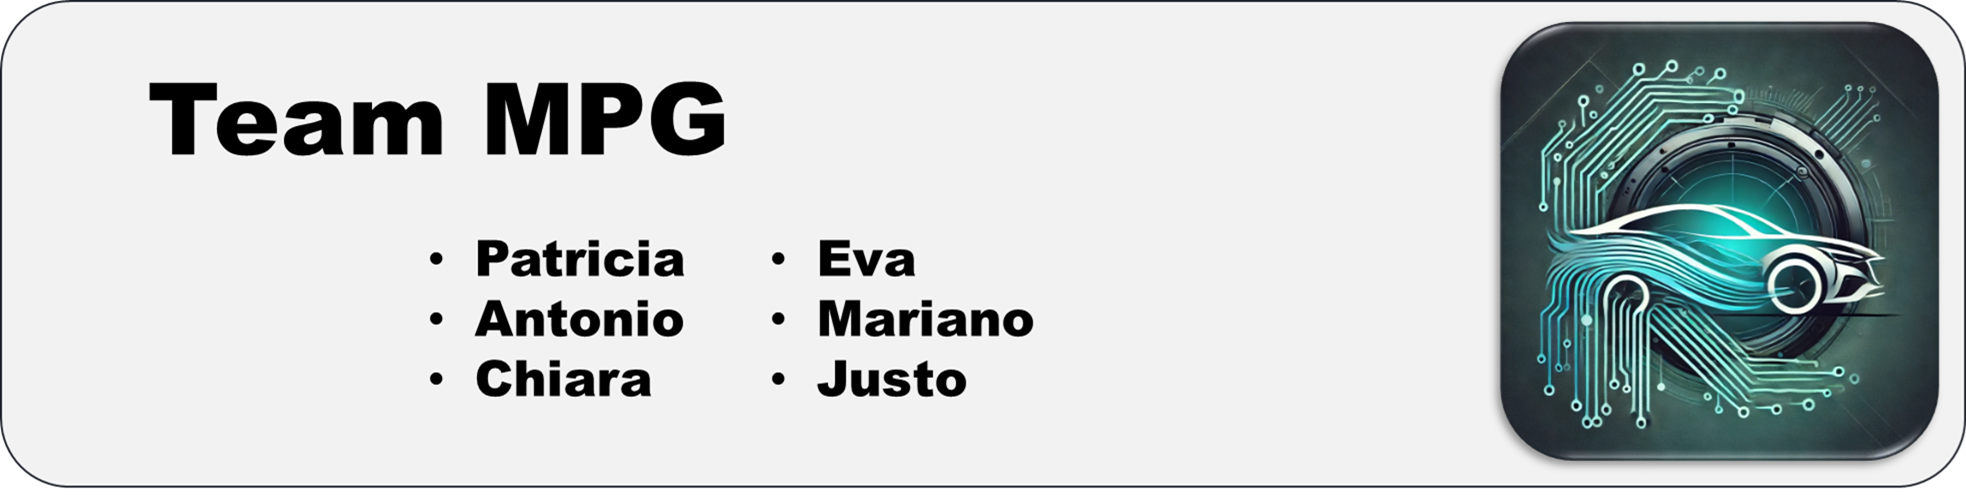

El set de datos muestra el consumo de combustible entre los años 2000 y 2022 en Canadá. Proporcionan calificaciones específicas del modelo sobre el consumo de combustible y las emisiones estimadas de dióxido de carbono para vehículos ligeros nuevos disponibles a la venta.

Fuente de datos: https://www.kaggle.com/datasets/ahmettyilmazz/fuel-consumption

# Descripción de las variables
<table>
<tr>
    <th>Nombre de columna</th>
    <th>Tipo de variable</th>
    <th>Descripción</th>
    <th>Comentarios</th>
</tr>
<tr>
    <td>year</td>
    <td>Numérica</td>
    <td>Año de fabricación del vehículo</td>
    <td></td>
</tr>
<tr>
    <td>brand</td>
    <td>Texto</td>
    <td>Marca</td>
    <td></td>
</tr>
<tr>
    <td>model</td>
    <td>Texto</td>
    <td>Modelo</td>
    <td></td>
</tr>
<tr>
    <td>vehicle_class</td>
    <td>Texto</td>
    <td>Tipo de vehiculo</td>
    <td></td>
</tr>
<tr>
    <td>engine_size</td>
    <td>Numérica</td>
    <td>Capacidad del motor</td>
    <td></td>
</tr>
<tr>
    <td>cylinders</td>
    <td>Numérica</td>
    <td>Número de cilindros</td>
    <td></td>
</tr>
<tr>
    <td>transmission</td>
    <td>Texto</td>
    <td>Tipo de transmisión</td>
    <td>A = Automatic; AM = Automated manual; AS = Automatic with select shift; AV = Continuously variable; M = Manual; 3 - 10 = Number of gears</td>
</tr>
<tr>
    <td>fuel_type</td>
    <td>Numérica</td>
    <td>Tipo de combustible</td>
    <td>X = Regular gasoline; Z = Premium gasoline; D = Diesel; E = Ethanol (E85); N = Natural Gas</td>
</tr>
<tr>
    <td>fuel_city_Lkm</td>
    <td>Numérica</td>
    <td>Consumo de combustible en ciudad litros cada 100km</td>
    <td></td>
</tr>
<tr>
    <td>fuel_hwy_Lkm</td>
    <td>Numérica</td>
    <td>Consumo de combustible en autovía litros cada 100km</td>
    <td></td>
</tr>
<tr>
    <td>fuel_comb_Lkm</td>
    <td>Numérica</td>
    <td>Consumo de combustible combinado (ciudad-autovía) litros cada 100km</td>
    <td></td>
</tr>
<tr>
    <td>fuel_comb_mpg</td>
    <td>Numérica</td>
    <td>Consumo de combustible combinado (ciudad-autovía) Millas por galón</td>
    <td></td>
</tr>
<tr>
    <td>co2</td>
    <td>Numérica</td>
    <td>Emisiónes de CO2</td>
    <td></td>
</tr>
</table>

In [1]:
import sys

sys.path.insert(0, '../')
import utils.common as cm
import utils.bootcampviztools as btz

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = cm.get_dataframe_train()
df.head()

,year,brand,model,vehicle_class,engine_size,cylinders,transmission,fuel_type,fuel_city_Lkm,fuel_hwy_Lkm,fuel_comb_Lkm,fuel_comb_mpg,co2
0,2002,FORD,FOCUS SEDAN #,COMPACT,2.0,4,A4,X,9.1,6.8,8.1,35,186
1,2021,Porsche,Panamera Turbo S,Full-size,4.0,8,AM8,Z,15.3,11.2,13.5,21,326
2,2011,INFINITI,EX35 AWD,STATION WAGON - SMALL,3.5,6,AS7,Z,12.4,8.5,10.6,27,244
3,2005,BUICK,RENDEZVOUS AWD,SUV,3.4,6,A4,X,12.7,8.7,10.9,26,251
4,2016,ROLLS-ROYCE,GHOST EWB,FULL-SIZE,6.6,12,AS8,Z,19.2,12.4,16.1,18,373


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18044 entries, 0 to 18043
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   year           18044 non-null  int64  
 1   brand          18044 non-null  object 
 2   model          18044 non-null  object 
 3   vehicle_class  18044 non-null  object 
 4   engine_size    18044 non-null  float64
 5   cylinders      18044 non-null  int64  
 6   transmission   18044 non-null  object 
 7   fuel_type      18044 non-null  object 
 8   fuel_city_Lkm  18044 non-null  float64
 9   fuel_hwy_Lkm   18044 non-null  float64
 10  fuel_comb_Lkm  18044 non-null  float64
 11  fuel_comb_mpg  18044 non-null  int64  
 12  co2            18044 non-null  int64  
dtypes: float64(4), int64(4), object(5)
memory usage: 1.8+ MB


In [4]:
cm.data_report(df).T

,DATA_TYPE,MISSINGS (%),UNIQUE_VALUES,CARDIN (%)
COL_N,,,,
year,int64,0.0,23,0.13
brand,object,0.0,87,0.48
model,object,0.0,3995,22.14
vehicle_class,object,0.0,32,0.18
engine_size,float64,0.0,63,0.35
cylinders,int64,0.0,9,0.05
transmission,object,0.0,30,0.17
fuel_type,object,0.0,5,0.03
fuel_city_Lkm,float64,0.0,225,1.25


# Target

* Target desbalanceado con larga cola hacia valores altos

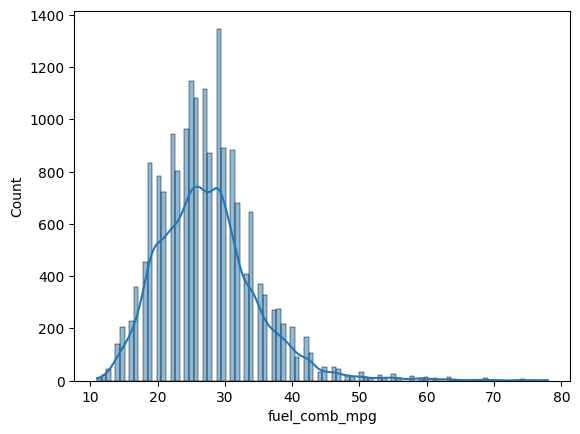

In [5]:
# Target = fuel_comb_mpg
target = cm.get_target()
sns.histplot(x = target, data = df, kde = True);

# Variables categóricas

* Columnas = ['brand', 'model', 'vehicle_class', 'transmission', 'fuel_type']
* Las columnas marca y modelo tienen una alta cardinalidad

In [7]:
features_cat = cm.get_features_cat_all(df)
features_cat

['brand', 'model', 'vehicle_class', 'transmission', 'fuel_type']

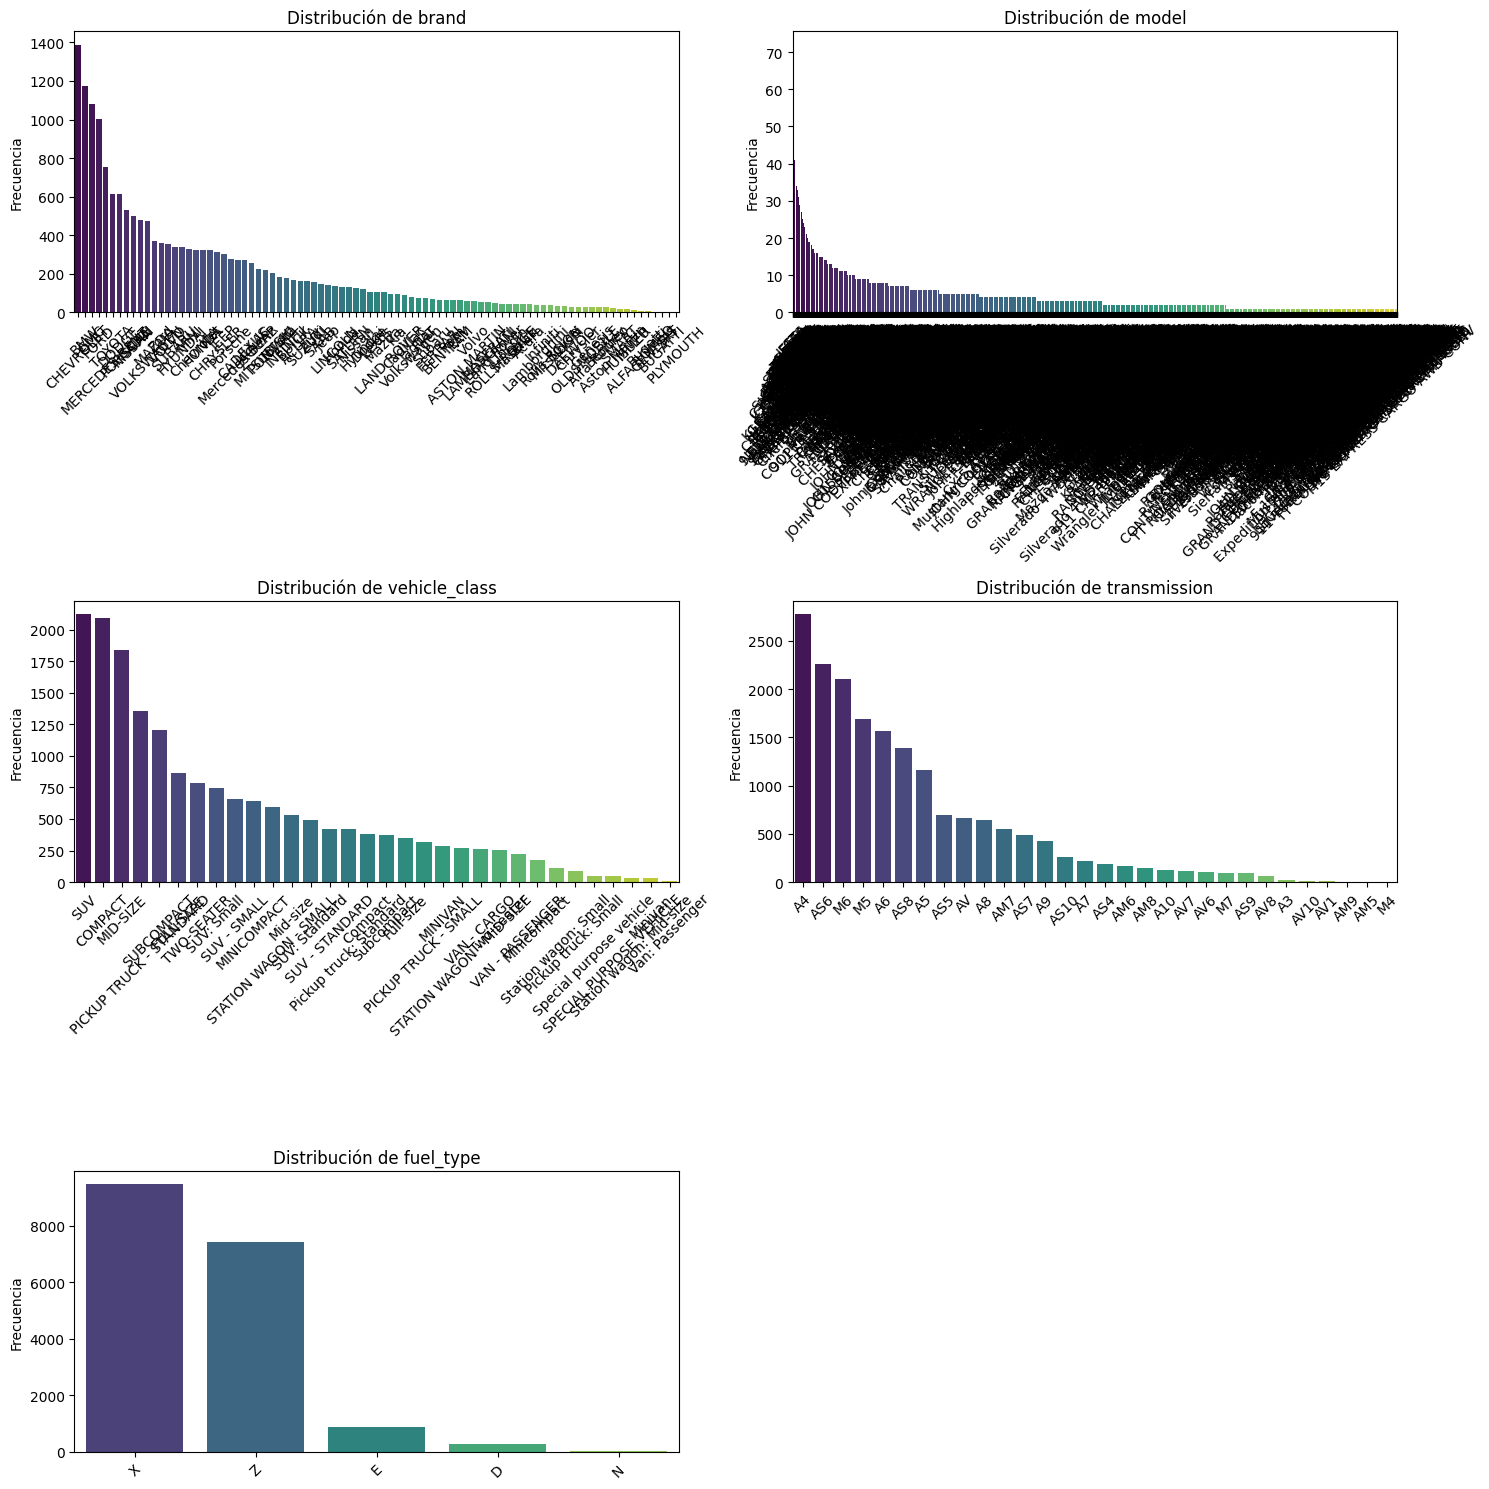

In [8]:
btz.pinta_distribucion_categoricas(df, features_cat)

# Variables numéricas

* Columnas = ['year', 'engine_size', 'cylinders', 'fuel_city_Lkm', 'fuel_hwy_Lkm', 'fuel_comb_Lkm', 'co2']
* 'cylinders' podría considerarse como categórica
* El resto de variables, excepto el año, tienen una distribución desbalanceada que podría corregirse con la aplicación del logaritmo

In [ ]:
features_num = cm.get_features_num_all(df)
features_num

['year',
 'engine_size',
 'cylinders',
 'fuel_city_Lkm',
 'fuel_hwy_Lkm',
 'fuel_comb_Lkm',
 'co2']

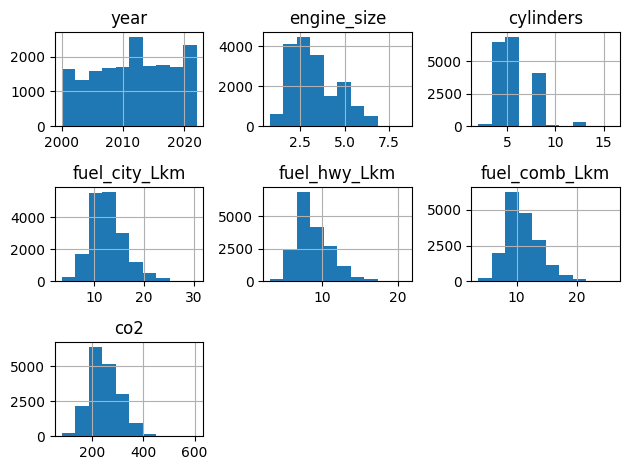

In [11]:
df[features_num].hist()
plt.tight_layout()

Las siguientes columnas tienen una alta correlación con el target fuel_comb_mpg"

* ['engine_size', 'cylinders', 'fuel_city_Lkm', 'fuel_hwy_Lkm', 'fuel_comb_Lkm', 'co2']


<Axes: >

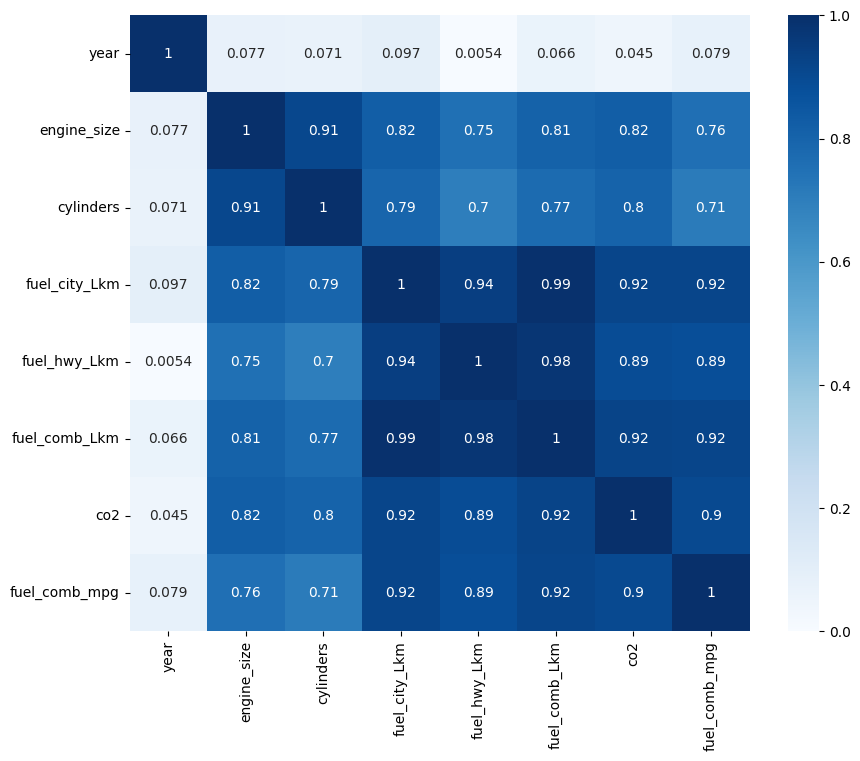

In [ ]:
plt.figure(figsize = (10,8))
sns.heatmap(np.abs(df[features_num + [target]].corr(numeric_only = True)), annot = True, cmap = "Blues", vmin = 0, vmax = 1)    